Importamos las librerías

In [ ]:
import numpy as np
import matplotlib.pylab as plt

#Volcado de datos
Si nos fijamos en la estructura de los datos que vamos a usar, podemos ver que tenemos un dataset con solo tres columnas y que en la primera fila tenemos los nombres de estas columnas: Municipios, Fenómeno demográfico y Total.

Esto quiere decir que, para poder acceder a la información de cada fenómeno demográfico por separado de un mismo municipio, en principio deberíamos guardar esa información en nuestra array. No obstante, las arrays de Numpy están pensadas para trabajar con valores númericos y no con strings, lo que nos dificulta hacer el volcado de datos directamente. Si estuviéramos trabajando con la librería pandas, sería tan sencillo como guardar todos los datos en un dataframe y agrupar los datos por fenómeno demográfico, pero esta no es una opción en Numpy.

Si le damos una segunda ojeada, podemos ver que parece que los datos vienen dados agrupados por municipio y con los fenómenos demógraficos dados en el mismo orden para cada uno de ellos, siguiendo la estructura:

* Municipio_a  "nacidos vivos por residencia materna"  x

* Municipio_a  "muertes fetales tardías por residencia materna"  y

* Municipio_a  "matrimonios por el lugar en que han fijado residencia"  z

* Municipio_a  "fallecidos por el lugar de residencia"  t

* Municipio_a  "crecimiento vegetativo"  w

De esta manera, será suficiente guardar los datos de la primera y tercera columna, para luego recorrer los datos de 5 en 5 para saber los datos de un cierto fenómeno por municipio.

Entonces, lo primero que haremos será guardar, mediante la función loadtext, los datos en la variable data. Hacemos usecols=(0,2) para solo coger la primera y tercera columna, nos saltamos la primera fila con los nombres de las columnas con skiprows=1 y usamos el converter que aparece abajo para quedarnos solo con el código postal del municipio que aparezca en cada fila. Dado que los municipios estan en el formato: "CP Nombre", aplicamos el método split al string y nos quedamos con la parte previa al espacio, convirtiendolo posteriormente a int (ya que los códigos postales son enteros).



In [ ]:
data=np.loadtxt('./data/50376.csv', delimiter=";", usecols=(0,2), skiprows=1, converters = {0: lambda s: int(str(s.decode(encoding="latin1")).split(" ")[0]), 2: lambda s: int(str(s.decode(encoding="latin1")).replace(".",""))})

Para asegurarnos de que hay exactamente 5 fenómenos para cada uno de los municipios, usaremos la función unique para ver cuantas veces se repite cada código postal.

In [ ]:
CP, counts=np.unique(data[:,0], return_counts=True)
print(np.unique(counts))

[5]


Observemos que hemos guardado en CP todos los códigos postales que aparecen en nuestros datos y aplicando la función unique a counts vemos que todos se repiten 5 veces.

Si quisieramos saber que tipos de fenómeno demográfico hay solo usando Numpy, sin necesitar habrir el documento csv, podríamos usar loadtext en la columna 1 y usando dtype=str para, posteriormente, aplicar la función unique.


In [ ]:
fen_dem=np.loadtxt('./data/50376.csv', delimiter=";", usecols=(1), skiprows=1, dtype=str)
np.unique(fen_dem)

array(['crecimiento vegetativo', 'fallecidos por el lugar de residencia',
       'matrimonios por el lugar en que han fijado residencia',
       'muertes fetales tardías por residencia materna',
       'nacidos vivos por residencia materna'], dtype='<U53')

#Análisis de los datos
Ahora que ya tenemos los datos guardados y hemos comprovado que no hay problemas, podemos empezar a estudiar los distintos indicadores propuestos. Empezaremos por la serie de por nacidos vivos por residencia materna. 

[7.000e+01 4.700e+01 1.780e+02 5.800e+01 1.090e+02 6.000e+00 5.700e+01
 3.000e+00 6.200e+01 1.000e+01 5.000e+01 3.400e+02 2.000e+01 1.000e+02
 1.090e+02 4.100e+01 2.080e+02 3.500e+01 1.400e+01 5.000e+00 4.340e+02
 3.000e+00 3.500e+01 1.000e+00 1.860e+02 3.900e+01 9.100e+01 4.000e+00
 3.340e+02 1.600e+01 5.800e+01 2.400e+01 2.770e+02 4.450e+02 1.300e+01
 2.390e+02 1.900e+01 2.640e+02 3.300e+01 6.000e+00 2.200e+01 7.700e+01
 3.345e+03 2.600e+01 1.700e+02 1.300e+02 5.000e+01 1.300e+01 3.400e+01
 2.300e+02 2.300e+01 5.200e+01 2.370e+02 6.100e+01 3.700e+01 8.000e+00
 3.030e+02 9.200e+01 6.300e+01 8.600e+01 3.300e+01 2.800e+01 3.200e+01
 9.400e+01 1.040e+02 1.300e+01 4.900e+01]


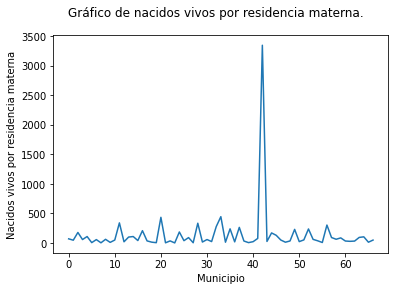

In [ ]:
#Serie de nacidos vivos por residencia materna
nvrm=data[:,1][::5]
print(nvrm)
#Grafico de nacidos vivos por residencia materna
fig, ax=plt.subplots()
ax.set_xlabel("Municipio")
ax.set_ylabel("Nacidos vivos por residencia materna")
plt.suptitle("Gráfico de nacidos vivos por residencia materna.")
ax.plot(nvrm)

Notemos que lo que aparece en el eje x es la posición del municipio en nuestra array. Para saber de que municipio se trata, tendríamos que mirar el valor de data[5*i, 0], donde i es el valor de municipio de nuestro gráfico.

A continuación, presentamos la serie ordenada de fallecidos por lugar de residencia. Notemos que, tal y como presentamos los datos, al ordenar, perdemos la información sobre municipio se corresponde con cada valor del eje x en el siguiente gráfico.

[0.000e+00 2.000e+00 3.000e+00 3.000e+00 3.000e+00 4.000e+00 7.000e+00
 8.000e+00 1.000e+01 1.000e+01 1.100e+01 1.200e+01 1.200e+01 1.700e+01
 2.300e+01 2.400e+01 2.500e+01 2.800e+01 2.800e+01 2.900e+01 3.000e+01
 3.000e+01 3.000e+01 3.000e+01 3.100e+01 3.900e+01 4.100e+01 4.200e+01
 4.200e+01 4.300e+01 4.400e+01 4.500e+01 4.600e+01 4.900e+01 5.200e+01
 5.200e+01 5.500e+01 5.500e+01 5.800e+01 5.900e+01 6.400e+01 6.500e+01
 6.500e+01 7.100e+01 8.500e+01 9.100e+01 9.400e+01 1.030e+02 1.080e+02
 1.080e+02 1.100e+02 1.280e+02 1.310e+02 1.340e+02 1.410e+02 1.510e+02
 1.720e+02 1.890e+02 2.000e+02 2.180e+02 2.190e+02 2.290e+02 2.460e+02
 2.940e+02 3.150e+02 3.410e+02 3.355e+03]


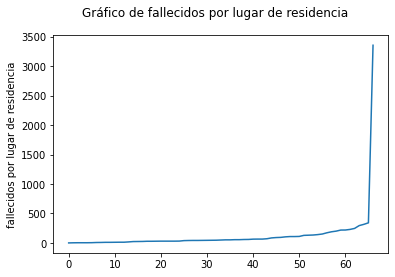

In [ ]:
#Serie ordenada de fallecidos por lugar de residencia 
fplr=data[:,1][3::5]
print(np.sort(fplr))
#Grafico de la serie ordenada
fig, ax=plt.subplots()
ax.set_ylabel("fallecidos por lugar de residencia")
plt.suptitle("Gráfico de fallecidos por lugar de residencia")
ax.plot(np.sort(fplr))

Pasemos a calcular la media de cada uno de los fenómenos demográficos estudiados:

In [ ]:
print("Media de nacidos vivos por residencia materna:", round(np.mean(nvrm),2))
print("Media de muertes fetales tardías por residencia materna:", round(np.mean(data[:,1][1::5]),2))
print("Media de matrimonios por el lugar en que han fijado residencia:", round(np.mean(data[:,1][2::5]),2))
print("Media de fallecidos por el lugar de residencia:", round(np.mean(fplr),2))
print("Media de crecimiento vegetativo:", round(np.mean(data[:,1][4::5]),2))

Media de nacidos vivos por residencia materna: 141.12
Media de muertes fetales tardías por residencia materna: 0.6
Media de matrimonios por el lugar en que han fijado residencia: 44.18
Media de fallecidos por el lugar de residencia: 127.75
Media de crecimiento vegetativo: 13.37


Finalmente, calculemos la desviación típica de los fenómenos demográficos estudiados:

In [ ]:
print("Desviación típica de nacidos vivos por residencia materna:", round(np.std(nvrm),2))
print("Desviación típica de muertes fetales tardías por residencia materna:", round(np.std(data[:,1][1::5]),2))
print("Desviación típica de matrimonios por el lugar en que han fijado residencia:", round(np.std(data[:,1][2::5]),2))
print("Desviación típica de fallecidos por el lugar de residencia:", round(np.std(fplr),2))
print("Desviación típica de crecimiento vegetativo:", round(np.std(data[:,1][4::5]),2))

Desviación típica de nacidos vivos por residencia materna: 408.25
Desviación típica de muertes fetales tardías por residencia materna: 2.04
Desviación típica de matrimonios por el lugar en que han fijado residencia: 135.04
Desviación típica de fallecidos por el lugar de residencia: 405.29
Desviación típica de crecimiento vegetativo: 32.63
